<h1>Regression</h1>

In [259]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

<p>An example using a standard dataset.</p>

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


<h3> Linear regression to analyse relationships between house prices and other variables.</h3>

In [4]:
#read the train csv from kaggle train data.
train = pd.read_csv("Data/train.csv")
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
pd.set_option('display.max_columns', None)
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
#Get info on the columns and their data types and no. of nulls etc.
pd.reset_option("display.max_columns")
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Show the na columns, since there are 81 columns in total
nan_values = train.isna()
nan_columns = nan_values.any()

columns_with_nan = train.columns[nan_columns].tolist()
print("There are {} columns that have null values: ".format(len(columns_with_nan)))
print(columns_with_nan)


There are 19 columns that have null values: 
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
#plot histogram of numeric cols
train.hist(bins=50, figsize=(20,18))
plt.show()

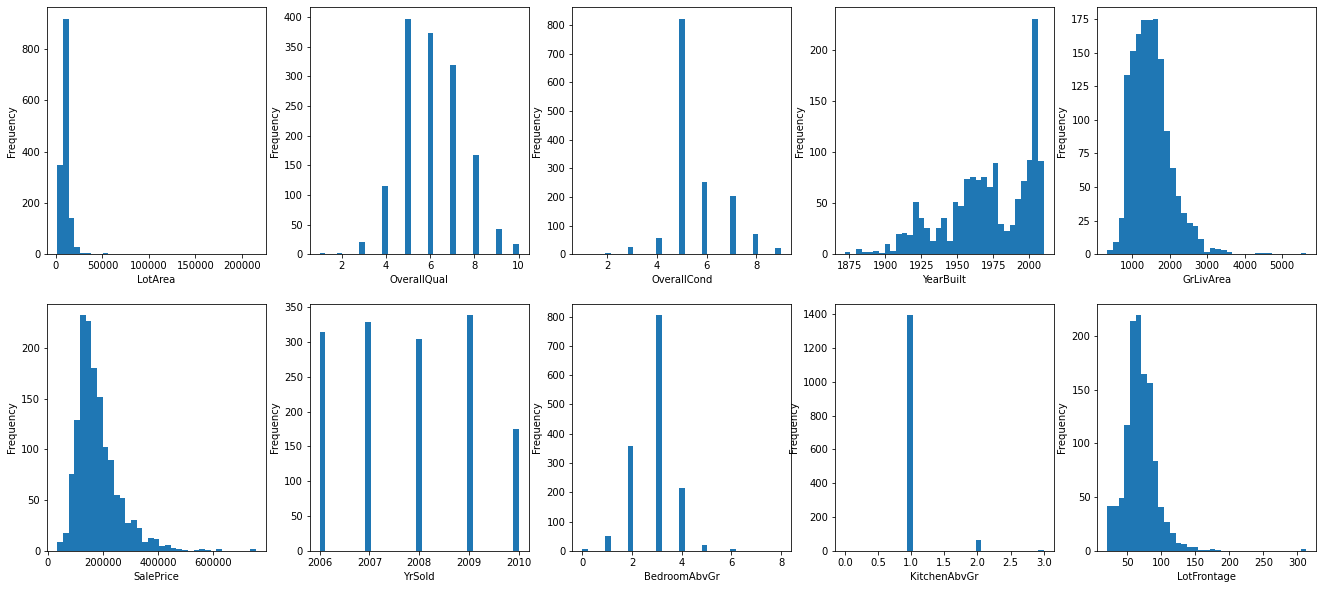

In [9]:
cols = ["LotArea","OverallQual","OverallCond","YearBuilt","GrLivArea","SalePrice","YrSold","BedroomAbvGr","KitchenAbvGr","LotFrontage"]

fig, ax  = plt.subplots(2,5)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.subplots_adjust(right=1.3)
row = 0
col = 0
for i in cols:
    if(col == 5):
        row+=1
        col=0
    ax[row][col].hist(train[i], bins=35)
    ax[row][col].set_xlabel(i)
    ax[row][col].set_ylabel("Frequency")
    col +=1
plt.show()

<p>We can see that there are a few integer columns like Year sold and Bedroom above ground. There are categoric columns like the overall quality and condition. The other columns are continuous and show a distribution.</p>

In [10]:
#Let us count the nulls of our target 10 columns and show the ones which have nulls.
for i in cols:
    no_of_null = train[i].isna().sum()
    if(no_of_null > 0):
        print("Number of nulls for {} is: {}".format(i,no_of_null))

Number of nulls for LotFrontage is: 259


<p>We can impute the missing values using KNN-Imputation using sk-learn's built in library.</p>

In [11]:
from sklearn.impute import KNNImputer

#create imputer
imputer = KNNImputer(n_neighbors=10)
lot_frontage = pd.DataFrame(imputer.fit_transform(train["LotFrontage"].values.reshape(-1,1)),columns=["LotFrontage"])
plt.boxplot(lot_frontage)
plt.show()
    

In [12]:
from scipy import stats
sns.scatterplot(data=train,x="GrLivArea",y="SalePrice",alpha=0.3)
plt.show()

sr = stats.spearmanr(train["GrLivArea"],train["SalePrice"])
pr = stats.pearsonr(train["GrLivArea"],train["SalePrice"])

print("Spearman rank correlation is {} and p-value is {}".format(sr[0],sr[1]))
print("Pearson rank correlation is {} and p-value is {}".format(pr[0],pr[1]))


Spearman rank correlation is 0.7313095834659141 and p-value is 1.4310154533091797e-244
Pearson rank correlation is 0.7086244776126522 and p-value is 4.518033646779431e-223


<p>There seems to be somewhat of a relationship between these GrLivArea and SalePrice. It is a quite positive correlation shown in the scatterplot aboce and the correlation coefficients of 0.7+.</p>

<p>We will be making a simple model using a single variable linear regression model. The indepenent variable will be the GrLivArea, the dependent will be the Sales Price.</p>

In [13]:
#let us use this build a linear regression model. we can use 70% of the data to train and 30% to fit.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train["GrLivArea"],train["SalePrice"],train_size=0.7)

#create a model 
lm = linear_model.LinearRegression()
#train it using the training data.
lm.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
#predict the values.
predicted_prices = lm.predict(np.array(x_test).reshape(-1,1))

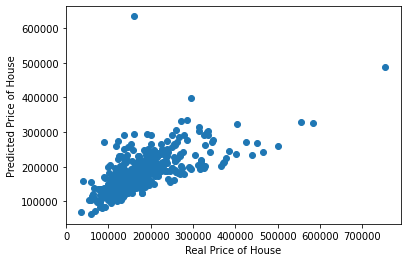

In [14]:
plt.scatter(y=predicted_prices,x=y_test)
plt.xlabel("Real Price of House")
plt.ylabel("Predicted Price of House")
plt.show()

In [220]:
# The coefficients
print('Coefficients: ', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predicted_prices))
# Root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, predicted_prices)))
price_r2 = r2_score(y_test,predicted_prices)
print("Coefficient of determination: %.2f" 
      % price_r2)

Coefficients:  [[109.61864713]]
Mean squared error: 3854297005.59
Root Mean squared error: 62082.98
Coefficient of determination: 0.43


<p>The coefficient, shows how much value increases in a house price per increase in unit GrLivArea. For this dataset, it is 102. The mean-squared error, shows the difference in predicted house prices squared, for this case the mean squared error is quite high. But to find the actual error in predictions, we would have to find the root mean squared error. That is 51,779 which quite a large value especially when comparing house prices. This discrepency can be caused by the model being entirely univariate. Including other numerical variables may reduce the error. 
    In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The R squared score here is 0.51 this means that the 50% variance in house prices are predictable from the GrLivArea.</p>

<h4>Multiple Linear Regression</h4>

In [16]:
#You can use this code, to check different correlations. And use the correlating variables to the linear model.
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



In [17]:
#We will try these these three variables and see how they fit. 
#The first one is the independent var i.e. the sales price so we exclude it.
cols = list(corr['SalePrice'].sort_values(ascending=False)[1:5].index)
cols

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

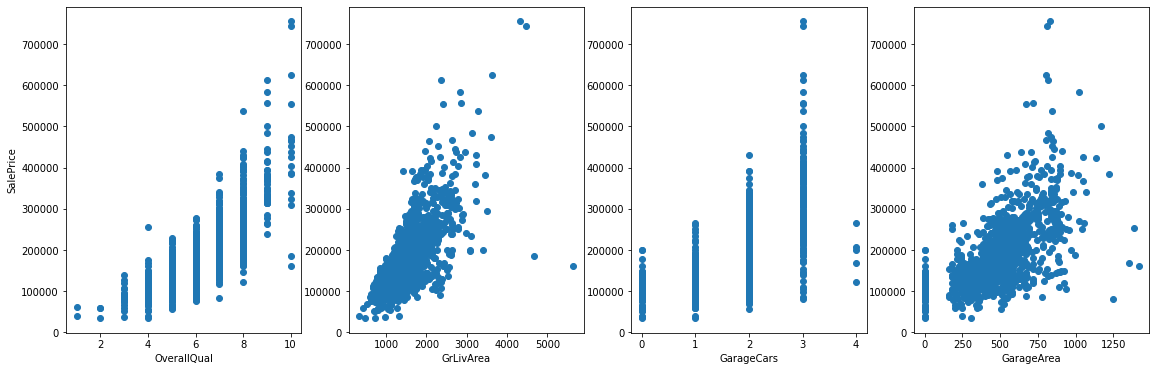

In [18]:
fig = plt.figure(figsize=(14,6))
sp = fig.subplots(1,len(cols))
fig.subplots_adjust(right=1.2)
sp[0].set_ylabel("SalePrice")  
i = 0
for col in cols:
    sp[i].scatter(y=train["SalePrice"],x=train[col])
    sp[i].set_xlabel(col)  
    i+=1


In [28]:
#create a new model
x2_train, x2_test, y2_train, y2_test = train_test_split(train[cols],train["SalePrice"],train_size=0.7)
#create a model 
lm2 = linear_model.LinearRegression()

#train it using the training data.
lm2.fit(np.array(x2_train),np.array(y2_train).reshape(-1,1))

#predict the values.
predicted_prices_mv = lm2.predict(np.array(x2_test))


In [38]:
train_mv = x2_test.copy()
train_mv["SalePrice"] =  y2_test
train_mv["SalePrice_pr"] = predicted_prices_mv
train_mv

OverallQual  GrLivArea  GarageCars  GarageArea  SalePrice   SalePrice_pr
143             7       1501           2         577     204000  211300.334985
485             5       1113           1         264     147000  114784.202047
230             6       1194           1         312     148000  147543.320521
1124            7       1482           2         392     163900  205221.882278
593             6        848           2         420     140000  150839.290403
...           ...        ...         ...         ...        ...            ...
1050            7       1302           2         436     176485  198731.302034
634             6       1056           2         576     144000  164222.006572
971             7       1626           2         474     173000  213747.420478
253             6       1302           1         309     158000  152103.145901
1261            5       1050           1         338     128900  114179.035963

[439 rows x 6 columns]

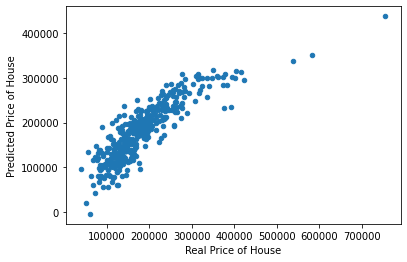

In [41]:
train_mv.plot(kind="scatter",x="SalePrice",y="SalePrice_pr")
plt.xlabel("Real Price of House")
plt.ylabel("Predicted Price of House")
plt.show()

<p>The model looks more linear when taking these multiple variables, the predictions have greater uniformity and a clearer pattern can be seen.</p>

In [219]:
# The coefficients
print('Coefficients: ', lm2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, predicted_prices_mv))
# Root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y2_test, predicted_prices_mv)))
price_r2 = r2_score(y2_test,predicted_prices_mv)
print("Coefficient of determination: %.2f" 
      % price_r2)

Coefficients:  [[27910.17974094    43.01058309 15106.1982473     28.43919799]]
Mean squared error: 1625717200.87
Root Mean squared error: 40320.18
Coefficient of determination: 0.74


<p>The coefficients, shows how much value increases in a house price per increase in each unit of the coefficients, they all have different weightage. The root mean squared error is still quite high but it is lower than the previous model and has a value of 40,320. This value is quite large when comparing house prices. There may be other variables that may cause this discrepency, however there may be severe outliers in the model.  
     The R squared score here is 0.74 this means that the 74% variance in house prices are predictable from the dependent variables.</p>

<h3> Linear regression to analyse relationships between crimes and socioeconomic characteristics</h3>

In [48]:
crime = pd.read_csv("Data/censusCrimeclean.csv")
crime.head()

communityname  fold  population  householdsize  racepctblack  \
0         Lakewoodcity     1        0.19           0.33          0.02   
1          Tukwilacity     1        0.00           0.16          0.12   
2         Aberdeentown     1        0.00           0.42          0.49   
3  Willingborotownship     1        0.04           0.77          1.00   
4    Bethlehemtownship     1        0.01           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
0          0.90          0.12         0.17         0.34         0.47  ...   
1          0.74          0.45         0.07         0.26         0.59  ...   
2          0.56          0.17         0.04         0.39         0.47  ...   
3          0.08          0.12         0.10         0.51         0.50  ...   
4          0.95          0.09         0.05         0.38         0.38  ...   

   NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0        0.0            0.12              0.42            0.50           0.51   
1        0.0            0.21              0.50            0.34           0.60   
2        0.0            0.14              0.49            0.54           0.67   
3        0.0            0.19              0.30            0.73           0.64   
4        0.0            0.11              0.72            0.64           0.61   

   PctSameState85  LandArea  PopDens  PctUsePubTrans  ViolentCrimesPerPop  
0            0.64      0.12     0.26            0.20                 0.20  
1            0.52      0.02     0.12            0.45                 0.67  
2            0.56      0.01     0.21            0.02                 0.43  
3            0.65      0.02     0.39            0.28                 0.12  
4            0.53      0.04     0.09            0.02                 0.03  

[5 rows x 102 columns]

<p>
    <b>Attribute Information: (122 predictive, 5 non-predictive, 1 goal)</b><ul>
<li> state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)</li>
<li> county: numeric code for county - not predictive, and many missing values (numeric) </li>
<li> community: numeric code for community - not predictive and many missing values (numeric) </li>
<li> communityname: community name - not predictive - for information only (string) </li>
<li> fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric) </li>
<li> population: population for community: (numeric - decimal) </li>
<li> householdsize: mean people per household (numeric - decimal) </li>
<li> racepctblack: percentage of population that is african american (numeric - decimal) </li>
<li> racePctWhite: percentage of population that is caucasian (numeric - decimal) </li>
<li> racePctAsian: percentage of population that is of asian heritage (numeric - decimal) </li>
<li> racePctHisp: percentage of population that is of hispanic heritage (numeric - decimal) </li>
<li> agePct12t21: percentage of population that is 12-21 in age (numeric - decimal) </li>
<li> agePct12t29: percentage of population that is 12-29 in age (numeric - decimal) </li>
<li> agePct16t24: percentage of population that is 16-24 in age (numeric - decimal) </li>
<li> agePct65up: percentage of population that is 65 and over in age (numeric - decimal) </li>
<li> numbUrban: number of people living in areas classified as urban (numeric - decimal) </li>
<li> pctUrban: percentage of people living in areas classified as urban (numeric - decimal) </li>
<li> medIncome: median household income (numeric - decimal) </li>
<li> pctWWage: percentage of households with wage or salary income in 1989 (numeric - decimal) </li>
<li> pctWFarmSelf: percentage of households with farm or self employment income in 1989 (numeric - decimal) </li>
<li> pctWInvInc: percentage of households with investment / rent income in 1989 (numeric - decimal) </li>
<li> pctWSocSec: percentage of households with social security income in 1989 (numeric - decimal) </li>
<li> pctWPubAsst: percentage of households with public assistance income in 1989 (numeric - decimal) </li>
<li> pctWRetire: percentage of households with retirement income in 1989 (numeric - decimal) </li>
<li> medFamInc: median family income (differs from household income for non-family households) (numeric - decimal) </li>
<li> perCapInc: per capita income (numeric - decimal) </li>
<li> whitePerCap: per capita income for caucasians (numeric - decimal) </li>
<li> blackPerCap: per capita income for african americans (numeric - decimal) </li>
<li> indianPerCap: per capita income for native americans (numeric - decimal) </li>
<li> AsianPerCap: per capita income for people with asian heritage (numeric - decimal) </li>
<li> OtherPerCap: per capita income for people with 'other' heritage (numeric - decimal) </li>
<li> HispPerCap: per capita income for people with hispanic heritage (numeric - decimal) </li>
<li> NumUnderPov: number of people under the poverty level (numeric - decimal) </li>
<li> PctPopUnderPov: percentage of people under the poverty level (numeric - decimal) </li>
<li> PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education (numeric - decimal) </li>
<li> PctNotHSGrad: percentage of people 25 and over that are not high school graduates (numeric - decimal) </li>
<li> PctBSorMore: percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal) </li>
<li> PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal) </li>
<li> PctEmploy: percentage of people 16 and over who are employed (numeric - decimal) </li>
<li> PctEmplManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal) </li>
<li> PctEmplProfServ: percentage of people 16 and over who are employed in professional services (numeric - decimal) </li>
<li> PctOccupManu: percentage of people 16 and over who are employed in manufacturing (numeric - decimal) ######## </li>
<li> PctOccupMgmtProf: percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal) </li>
<li> MalePctDivorce: percentage of males who are divorced (numeric - decimal) </li>
<li> MalePctNevMarr: percentage of males who have never married (numeric - decimal) </li>
<li> FemalePctDiv: percentage of females who are divorced (numeric - decimal) </li>
<li> TotalPctDiv: percentage of population who are divorced (numeric - decimal) </li>
<li> PersPerFam: mean number of people per family (numeric - decimal) </li>
<li> PctFam2Par: percentage of families (with kids) that are headed by two parents (numeric - decimal) </li>
<li> PctKids2Par: percentage of kids in family housing with two parents (numeric - decimal) </li>
<li> PctYoungKids2Par: percent of kids 4 and under in two parent households (numeric - decimal) </li>
<li> PctTeen2Par: percent of kids age 12-17 in two parent households (numeric - decimal) </li>
<li> PctWorkMomYoungKids: percentage of moms of kids 6 and under in labor force (numeric - decimal) </li>
<li> PctWorkMom: percentage of moms of kids under 18 in labor force (numeric - decimal) </li>
<li> NumIlleg: number of kids born to never married (numeric - decimal) </li>
<li> PctIlleg: percentage of kids born to never married (numeric - decimal) </li>
<li> NumImmig: total number of people known to be foreign born (numeric - decimal) </li>
<li> PctImmigRecent: percentage of _immigrants_ who immigated within last 3 years (numeric - decimal) </li>
<li> PctImmigRec5: percentage of _immigrants_ who immigated within last 5 years (numeric - decimal) </li>
<li> PctImmigRec8: percentage of _immigrants_ who immigated within last 8 years (numeric - decimal) </li>
<li> PctImmigRec10: percentage of _immigrants_ who immigated within last 10 years (numeric - decimal) </li>
<li> PctRecentImmig: percent of _population_ who have immigrated within the last 3 years (numeric - decimal) </li>
<li> PctRecImmig5: percent of _population_ who have immigrated within the last 5 years (numeric - decimal) </li>
<li> PctRecImmig8: percent of _population_ who have immigrated within the last 8 years (numeric - decimal) </li>
<li> PctRecImmig10: percent of _population_ who have immigrated within the last 10 years (numeric - decimal) </li>
<li> PctSpeakEnglOnly: percent of people who speak only English (numeric - decimal) </li>
<li> PctNotSpeakEnglWell: percent of people who do not speak English well (numeric - decimal) </li>
<li> PctLargHouseFam: percent of family households that are large (6 or more) (numeric - decimal) </li>
<li> PctLargHouseOccup: percent of all occupied households that are large (6 or more people) (numeric - decimal) </li>
<li> PersPerOccupHous: mean persons per household (numeric - decimal) </li>
<li> PersPerOwnOccHous: mean persons per owner occupied household (numeric - decimal) </li>
<li> PersPerRentOccHous: mean persons per rental household (numeric - decimal) </li>
<li> PctPersOwnOccup: percent of people in owner occupied households (numeric - decimal) </li>
<li> PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) (numeric - decimal) </li>
<li> PctHousLess3BR: percent of housing units with less than 3 bedrooms (numeric - decimal) </li>
<li> MedNumBR: median number of bedrooms (numeric - decimal) </li>
<li> HousVacant: number of vacant households (numeric - decimal) </li>
<li> PctHousOccup: percent of housing occupied (numeric - decimal) </li>
<li> PctHousOwnOcc: percent of households owner occupied (numeric - decimal) </li>
<li> PctVacantBoarded: percent of vacant housing that is boarded up (numeric - decimal) </li>
<li> PctVacMore6Mos: percent of vacant housing that has been vacant more than 6 months (numeric - decimal) </li>
<li> MedYrHousBuilt: median year housing units built (numeric - decimal) </li>
<li> PctHousNoPhone: percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal) </li>
<li> PctWOFullPlumb: percent of housing without complete plumbing facilities (numeric - decimal) </li>
<li> OwnOccLowQuart: owner occupied housing - lower quartile value (numeric - decimal) </li>
<li> OwnOccMedVal: owner occupied housing - median value (numeric - decimal) </li>
<li> OwnOccHiQuart: owner occupied housing - upper quartile value (numeric - decimal) </li>
<li> RentLowQ: rental housing - lower quartile rent (numeric - decimal) </li>
<li> RentMedian: rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal) </li>
<li> RentHighQ: rental housing - upper quartile rent (numeric - decimal) </li>
<li> MedRent: median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal) </li>
<li> MedRentPctHousInc: median gross rent as a percentage of household income (numeric - decimal) </li>
<li> MedOwnCostPctInc: median owners cost as a percentage of household income - for owners with a mortgage (numeric - decimal) </li>
<li> MedOwnCostPctIncNoMtg: median owners cost as a percentage of household income - for owners without a mortgage (numeric - decimal) </li>
<li> NumInShelters: number of people in homeless shelters (numeric - decimal) </li>
<li> NumStreet: number of homeless people counted in the street (numeric - decimal) </li>
<li> PctForeignBorn: percent of people foreign born (numeric - decimal) </li>
<li> PctBornSameState: percent of people born in the same state as currently living (numeric - decimal) </li>
<li> PctSameHouse85: percent of people living in the same house as in 1985 (5 years before) (numeric - decimal) </li>
<li> PctSameCity85: percent of people living in the same city as in 1985 (5 years before) (numeric - decimal) </li>
<li> PctSameState85: percent of people living in the same state as in 1985 (5 years before) (numeric - decimal) </li>
<li> LemasSwornFT: number of sworn full time police officers (numeric - decimal) </li>
<li> LemasSwFTPerPop: sworn full time police officers per 100K population (numeric - decimal) </li>
<li> LemasSwFTFieldOps: number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - decimal) </li>
<li> LemasSwFTFieldPerPop: sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal) </li>
<li> LemasTotalReq: total requests for police (numeric - decimal) </li>
<li> LemasTotReqPerPop: total requests for police per 100K popuation (numeric - decimal) </li>
<li> PolicReqPerOffic: total requests for police per police officer (numeric - decimal) </li>
<li> PolicPerPop: police officers per 100K population (numeric - decimal) </li>
<li> RacialMatchCommPol: a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar (numeric - decimal) </li>
<li> PctPolicWhite: percent of police that are caucasian (numeric - decimal) </li>
<li> PctPolicBlack: percent of police that are african american (numeric - decimal) </li>
<li> PctPolicHisp: percent of police that are hispanic (numeric - decimal) </li>
<li> PctPolicAsian: percent of police that are asian (numeric - decimal) </li>
<li> PctPolicMinor: percent of police that are minority of any kind (numeric - decimal) </li>
<li> OfficAssgnDrugUnits: number of officers assigned to special drug units (numeric - decimal) </li>
<li> NumKindsDrugsSeiz: number of different kinds of drugs seized (numeric - decimal) </li>
<li> PolicAveOTWorked: police average overtime worked (numeric - decimal) </li>
<li> LandArea: land area in square miles (numeric - decimal) </li>
<li> PopDens: population density in persons per square mile (numeric - decimal) </li>
<li> PctUsePubTrans: percent of people using public transit for commuting (numeric - decimal) </li>
<li> PolicCars: number of police cars (numeric - decimal) </li>
<li> PolicOperBudg: police operating budget (numeric - decimal) </li>
<li> LemasPctPolicOnPatr: percent of sworn full time police officers on patrol (numeric - decimal) </li>
<li> LemasGangUnitDeploy: gang unit deployed (numeric - decimal - but really ordinal - 0 means NO, 1 means YES, 0.5 means Part Time) </li>
<li> LemasPctOfficDrugUn: percent of officers assigned to drug units (numeric - decimal) </li>
<li> PolicBudgPerPop: police operating budget per population (numeric - decimal) </li>
<li><b>ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)</b> </li>
<p>

In [120]:
#You can use this code, to check different correlations. And use the correlating variables to the linear model.
crime_features = crime.select_dtypes(include=["number"])
corr_crimes = crime_features.corr()

pos_crime = corr_crimes['ViolentCrimesPerPop'].sort_values(ascending=False)[1:9]
neg_crime = corr_crimes['ViolentCrimesPerPop'].sort_values(ascending=True)[0:10]

#here are statistics which seem to be positively correlated with crime rates.
print("With respect to violent crimes per population, here are positively correlated variables: \n",
      pos_crime)

#Here are negatively correlated 
print("\n Here are negatively correlated variables: \n",neg_crime)


With respect to violent crimes per population, here are positively correlated variables: 
 PctIlleg          0.737957
racepctblack      0.631264
pctWPubAsst       0.574665
FemalePctDiv      0.556032
TotalPctDiv       0.552777
MalePctDivorce    0.525407
PctPopUnderPov    0.521877
PctUnemployed     0.504235
Name: ViolentCrimesPerPop, dtype: float64

 Here are negatively correlated variables: 
 PctKids2Par        -0.738424
PctFam2Par         -0.706667
racePctWhite       -0.684770
PctYoungKids2Par   -0.666059
PctTeen2Par        -0.661582
pctWInvInc         -0.576324
PctPersOwnOccup    -0.525491
PctHousOwnOcc      -0.470683
medFamInc          -0.439108
medIncome          -0.424221
Name: ViolentCrimesPerPop, dtype: float64


In [100]:
#We can try scipy stats linregress to do the same thing. 
#Since this dataset is clean we can use it confidently 
crime.describe()

fold   population  householdsize  racepctblack  racePctWhite  \
count  1994.000000  1994.000000    1994.000000   1994.000000   1994.000000   
mean      5.493982     0.057593       0.463395      0.179629      0.753716   
std       2.873694     0.126906       0.163717      0.253442      0.244039   
min       1.000000     0.000000       0.000000      0.000000      0.000000   
25%       3.000000     0.010000       0.350000      0.020000      0.630000   
50%       5.000000     0.020000       0.440000      0.060000      0.850000   
75%       8.000000     0.050000       0.540000      0.230000      0.940000   
max      10.000000     1.000000       1.000000      1.000000      1.000000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
count   1994.000000  1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean       0.153681     0.144022     0.424218     0.493867     0.336264  ...   
std        0.208877     0.232492     0.155196     0.143564     0.166505  ...   
min        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%        0.040000     0.010000     0.340000     0.410000     0.250000  ...   
50%        0.070000     0.040000     0.400000     0.480000     0.290000  ...   
75%        0.170000     0.160000     0.470000     0.540000     0.360000  ...   
max        1.000000     1.000000     1.000000     1.000000     1.000000  ...   

         NumStreet  PctForeignBorn  PctBornSameState  PctSameHouse85  \
count  1994.000000     1994.000000       1994.000000     1994.000000   
mean      0.022778        0.215552          0.608892        0.535050   
std       0.100400        0.231134          0.204329        0.181352   
min       0.000000        0.000000          0.000000        0.000000   
25%       0.000000        0.060000          0.470000        0.420000   
50%       0.000000        0.130000          0.630000        0.540000   
75%       0.000000        0.280000          0.777500        0.660000   
max       1.000000        1.000000          1.000000        1.000000   

       PctSameCity85  PctSameState85     LandArea      PopDens  \
count    1994.000000     1994.000000  1994.000000  1994.000000   
mean        0.626424        0.651530     0.065231     0.232854   
std         0.200521        0.198221     0.109459     0.203092   
min         0.000000        0.000000     0.000000     0.000000   
25%         0.520000        0.560000     0.020000     0.100000   
50%         0.670000        0.700000     0.040000     0.170000   
75%         0.770000        0.790000     0.070000     0.280000   
max         1.000000        1.000000     1.000000     1.000000   

       PctUsePubTrans  ViolentCrimesPerPop  
count     1994.000000          1994.000000  
mean         0.161685             0.237979  
std          0.229055             0.232985  
min          0.000000             0.000000  
25%          0.020000             0.070000  
50%          0.070000             0.150000  
75%          0.190000             0.330000  
max          1.000000             1.000000  

[8 rows x 101 columns]

In [119]:
crime.isnull().sum().sort_values(ascending=False)

ViolentCrimesPerPop    0
PctEmplProfServ        0
OtherPerCap            0
HispPerCap             0
NumUnderPov            0
                      ..
PctPersDenseHous       0
PctHousLess3BR         0
MedNumBR               0
HousVacant             0
communityname          0
Length: 102, dtype: int64

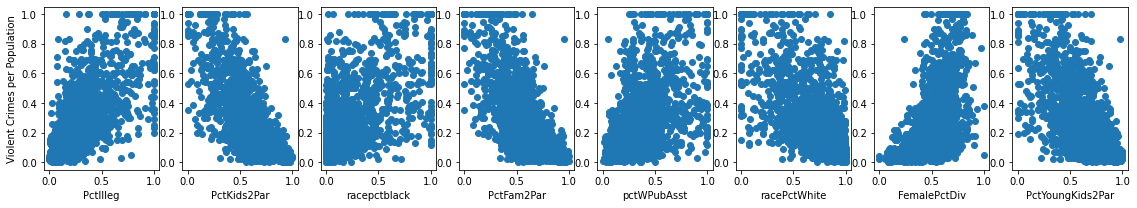

In [166]:
cols = []
#get the top 5 positive and negatively correlated columns so we can use it to model.
for a,b in zip(pos_crime[0:4].index,neg_crime[0:4].index):
    cols.append(a)
    cols.append(b)

#we can use these to plot with the ViolentCrimes 

fig = plt.figure(figsize=(14,3))
sp = fig.subplots(1,len(cols))
fig.subplots_adjust(right=1.2)
sp[0].set_ylabel("Violent Crimes per Population")  
i = 0
for col in cols:
    sp[i].scatter(y=crime["ViolentCrimesPerPop"],x=crime[col])
    sp[i].set_xlabel(col)  
    i+=1


In [202]:
#Let us create a single variable model using medIncome using SciPy
x, xc_t, y, yc_t = train_test_split(crime["medIncome"],crime["ViolentCrimesPerPop"],train_size=0.7)

#Get statistics and line parameters from the equation
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)


slope: -0.462801    intercept: 0.404004
R-squared: 0.184423


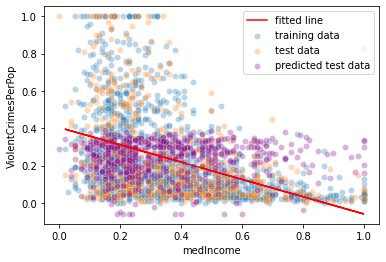

In [209]:
#Trying it with polyval, using the slope and intercepts from before to predict the data.
modelledDependent = np.polyval([slope, intercept], x_ct)

#Plot the line
sns.scatterplot(x=x,y=y, label='training data', alpha=0.3, )
sns.scatterplot(x=xc_t,y=yc_t, label="test data", alpha=0.3)
sns.scatterplot(x=xc_t,y=modelledDependent,label="predicted test data", alpha=0.3, color="purple")
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()



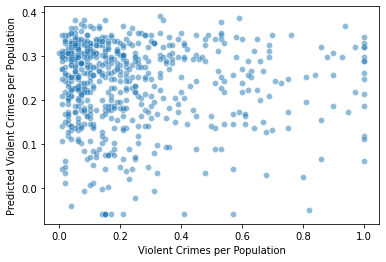

In [215]:
#Let us compare our regression model predicted values with our real values
sns.scatterplot(x=yc_t,y=modelledDependent, alpha=0.5, )
plt.xlabel("Violent Crimes per Population")
plt.ylabel("Predicted Violent Crimes per Population")
plt.show()

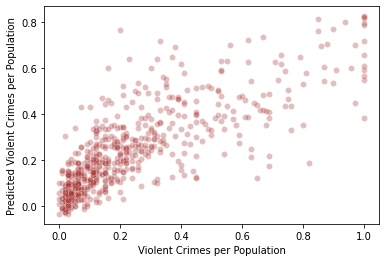

In [163]:
#Multiple regression model
#create a new model
xc_train, xc_test, yc_train, yc_test = train_test_split(crime[cols],crime["ViolentCrimesPerPop"],train_size=0.7)

#create a model 
lmc = linear_model.LinearRegression()

#train it using the training data.
lmc.fit(np.array(xc_train),np.array(yc_train).reshape(-1,1))

#predict the values.
predicted_crime_rates = lmc.predict(np.array(xc_test))

#plot and see.
sns.scatterplot(x=yc_test,y=predicted_crime_rates.reshape(-1), alpha=0.3, color="brown")
plt.xlabel("Violent Crimes per Population")
plt.ylabel("Predicted Violent Crimes per Population")
plt.show()


In [258]:
# The coefficients
print('Coefficients: ', lmc.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(yc_test, predicted_crime_rates))
# Root mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yc_test, predicted_crime_rates)))
crime_r = r2_score(yc_test,predicted_crime_rates)
print("Coefficient of determination: %.2f" 
      % crime_r)

Coefficients:  [[ 0.2669009  -0.78540563 -0.02239495  0.5109296   0.01490368 -0.20820738
   0.19637776  0.00741803]]
Mean squared error: 0.02
Root Mean squared error: 0.15
Coefficient of determination: 0.62


<h3>Logistic regression to analyse Titanic survival</h3>

In [296]:
passenger = pd.read_csv("Data/passengerData.csv")
ticket = pd.read_excel("Data/ticketPrices.xlsx")

#Merge the type dataframes together, when two columns have the same name,
#does not need to state the column name to merge on but- it is done for good practise.
titanic = passenger.merge(ticket,on="TicketType")
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            9         1       3   
2           17         0       3   
3           25         0       3   
4           33         1       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
2                               Rice, Master. Eugene    male   2.0   
3                      Palsson, Miss. Torborg Danira  female   8.0   
4                           Glynn, Miss. Mary Agatha  female   NaN   

   TicketType  Fare  
0           1    33  
1           1    33  
2           1    33  
3           1    33  
4           1    33

In [413]:
#There is a test/ train class dataset.
train = pd.read_csv("Data/train_titanic.csv")
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [328]:
#here is the test dataset.
test = pd.read_csv("Data/test.csv")
#get the survived data
test = test.merge(pd.read_csv("Data/gender_submission.csv"))
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1

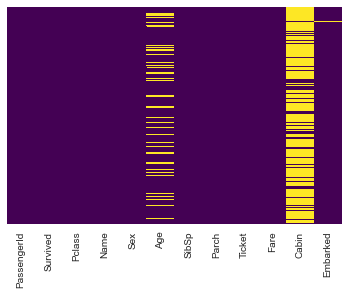

In [329]:
sns.set_style("whitegrid")
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

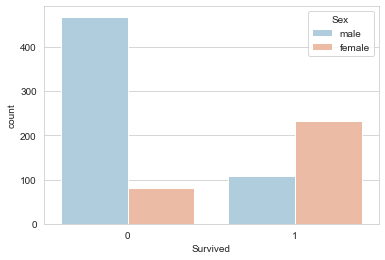

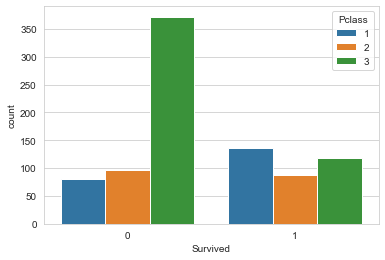

In [336]:
#Survial rate by gender
sns.countplot(x="Survived",hue="Sex",data=train, palette="RdBu_r")
plt.show()

#Surival rate per class
sns.countplot(x="Survived",hue="Pclass",data=train)
plt.show()

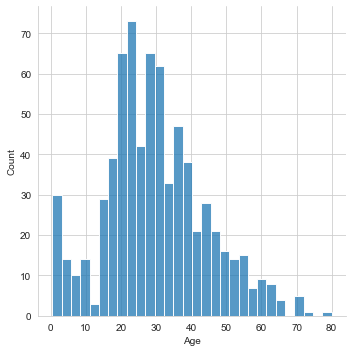

In [342]:
sns.displot(train["Age"].dropna(),kde=False,bins=30)
plt.show()

In [344]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


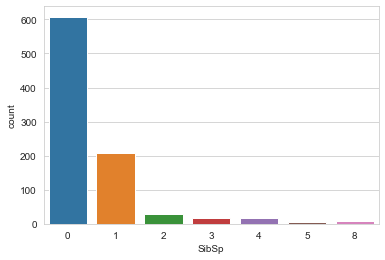

In [353]:
#Distribution of siblings and spouses of people, mainly 0 so single or 1 most likely spouse
sns.countplot(x="SibSp",data=train)
plt.show()

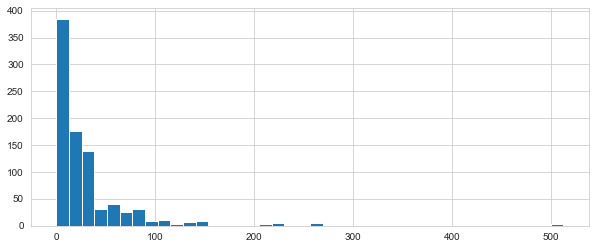

In [354]:
#Distribution of fare prices.
train["Fare"].hist(bins=40,figsize=(10,4))
plt.show()

In [357]:
import cufflinks as cf

In [359]:
cf.go_offline()

In [362]:
#interactive plot
train["Fare"].iplot(kind="hist",bins=100)
plt.show()

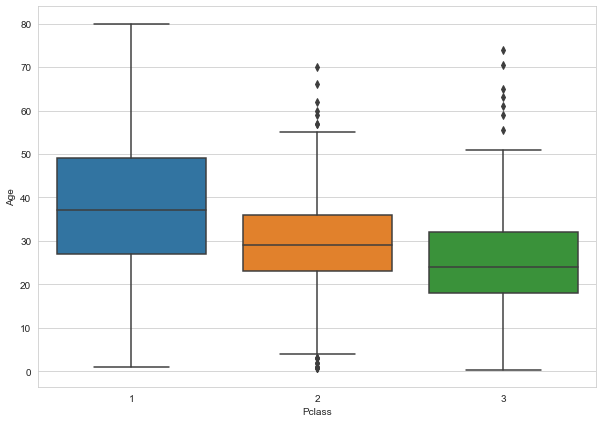

In [365]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)
plt.show()

In [407]:
train.groupby("Pclass")["Age"].describe()["mean"]

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: mean, dtype: float64

In [471]:
def impute_age(cols, test_or_train):
    """
    Fill the average ages by class.
    """
    Age = cols[0]
    Pclass = cols[1]
    avg_age = test.groupby("Pclass")["Age"].describe()["mean"]
    if(test_or_train == "train"):
        avg_age = train.groupby("Pclass")["Age"].describe()["mean"]
        
    if pd.isnull(Age):
        return avg_age[Pclass]
    else:
        return Age

In [414]:
#Appy across columns and replace ages 
train["Age"] = train[["Age","Pclass"]].apply(lambda x: impute_age(x,"train"),axis=1)  


#We know cabin or not. 
train["know_cabin"] = train["Cabin"].apply(lambda x: 0 if np.nan else 1)

#get rid of cabin column 
train.drop("Cabin",axis=1, inplace=True)

In [415]:
#get rid of any misisng values, only a few.
train.dropna(inplace=True)

#Heatmap is clean.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [410]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  know_cabin  
0      0         A/5 21171   7.2500        S           0  
1      0          PC 17599  71.2833        C           0  
2      0  STON/O2. 3101282   7.9250        S           0  
3      0            113803  53.1000        S           0  
4      0            373450   8.0500        S           0

In [416]:
#Convert categorical data into dummies using pandas, i.e. male and female
#We need to drop one of the columns, THis is because one column will be a perfect predictor of another 
#Multiple-Collinearity
sex = pd.get_dummies(train["Sex"],drop_first = True) #Drop first removes 1 
print(sex.head(),"\n")

#indicator and dummy variable
embark = pd.get_dummies(train["Embarked"], drop_first=True)
print(embark.head())

   male
0     1
1     0
2     0
3     0
4     1 

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [417]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  know_cabin  male  Q  S  
0      0         A/5 21171   7.2500        S           0     1  0  1  
1      0          PC 17599  71.2833        C           0     0  0  0  
2      0  STON/O2. 3101282   7.9250        S           0     0  0  1  
3      0            113803  53.1000        S           0     0  0  1  
4      0            373450   8.0500        S           0     1  0  1

In [419]:
#get rid of columns we wont use.
train.drop(["Sex","Embarked","Name","Ticket"],axis=1, inplace=True)

In [423]:
#PassengerId is not useful as it is just index, not useful to predict anything.
train.drop(["PassengerId"],axis=1,inplace=True)

In [424]:
#All data is numerical and concatenated. and ready for machine learning 
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  know_cabin  male  Q  S
0         0       3  22.0      1      0   7.2500           0     1  0  1
1         1       1  38.0      1      0  71.2833           0     0  0  0
2         1       3  26.0      0      0   7.9250           0     0  0  1
3         1       1  35.0      1      0  53.1000           0     0  0  1
4         0       3  35.0      0      0   8.0500           0     1  0  1

In [448]:
#now we have to clean the Test Data
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1

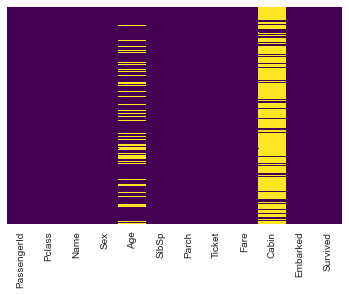

In [451]:
#Heatmap is clean.
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()


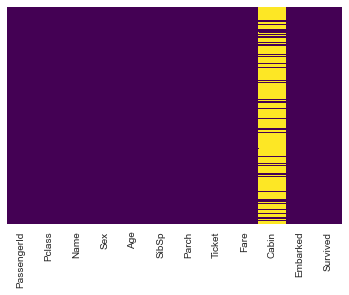

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  Survived  know_cabin  
0  34.5      0      0   330911   7.8292        Q         0           0  
1  47.0      1      0   363272   7.0000        S         1           0  
2  62.0      0      0   240276   9.6875        Q         0           0  
3  27.0      0      0   315154   8.6625        S         0           0  
4  22.0      1      1  3101298  12.2875        S         1           0

In [477]:
#we need to fill in the age like we did before.
test["Age"] = test[["Age","Pclass"]].apply(lambda x: impute_age(x,"test"),axis=1)  

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

#We know cabin or not. 
test["know_cabin"] = test["Cabin"].apply(lambda x: 0 if np.nan else 1)

#get rid of cabin column 
test.drop("Cabin",axis=1, inplace=True)

test.head()

In [480]:
#Convert categorical data into dummies using pandas, i.e. male and female
#We need to drop one of the columns, THis is because one column will be a perfect predictor of another 
#Multiple-Collinearity
sex = pd.get_dummies(test["Sex"],drop_first = True) #Drop first removes 1 
print(sex.head(),"\n")

#indicator and dummy variable
embark = pd.get_dummies(test["Embarked"], drop_first=True)
print(embark.head())

test = pd.concat([test,sex,embark],axis=1)
test.head()

   male
0     1
1     0
2     1
3     1
4     0 

   Q  S
0  1  0
1  0  1
2  1  0
3  0  1
4  0  1


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  Survived  know_cabin  male  \
0  34.5      0      0   330911   7.8292        Q         0           0     1   
1  47.0      1      0   363272   7.0000        S         1           0     0   
2  62.0      0      0   240276   9.6875        Q         0           0     1   
3  27.0      0      0   315154   8.6625        S         0           0     1   
4  22.0      1      1  3101298  12.2875        S         1           0     0   

   Q  S  
0  1  0  
1  0  1  
2  1  0  
3  0  1  
4  0  1

In [482]:
#get rid of columns we wont use.
test.drop(["Sex","Embarked","Name","Ticket","PassengerId"],axis=1, inplace=True)

In [484]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  know_cabin  male  Q  S
0         0       3  22.0      1      0   7.2500           0     1  0  1
1         1       1  38.0      1      0  71.2833           0     0  0  0
2         1       3  26.0      0      0   7.9250           0     0  0  1
3         1       1  35.0      1      0  53.1000           0     0  0  1
4         0       3  35.0      0      0   8.0500           0     1  0  1

In [490]:
#get rid of any missing values
test.dropna(inplace=True)
test.head()

Pclass   Age  SibSp  Parch     Fare  Survived  know_cabin  male  Q  S
0       3  34.5      0      0   7.8292         0           0     1  1  0
1       3  47.0      1      0   7.0000         1           0     0  0  1
2       2  62.0      0      0   9.6875         0           0     1  1  0
3       3  27.0      0      0   8.6625         0           0     1  0  1
4       3  22.0      1      1  12.2875         1           0     0  0  1

<p>Now train and test have been cleaned, we can use them for machine learning, with Logistic Regression.</p>

In [491]:
#to do machine learning, we need to have an objective column and a column we want to use to predict that objective.
xtit_train = train.drop("Survived",axis=1)
ytit_train = train["Survived"]
xtit_test = test.drop("Survived",axis=1)
ytit_test = test["Survived"]


In [492]:
from sklearn.linear_model import LogisticRegression

In [493]:
#create a model
logmodel = LogisticRegression()

#train the model
logmodel.fit(xtit_train,ytit_train)

c:\users\sathi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [494]:
#Predict values
predictions = logmodel.predict(xtit_test)


In [440]:
#To get statistics
from sklearn.metrics import classification_report

In [495]:
#Print classification report
print(classification_report(ytit_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       265
           1       0.90      0.91      0.91       152

    accuracy                           0.93       417
   macro avg       0.92      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



In [445]:
#try import a confusion matrix
from sklearn.metrics import confusion_matrix

In [497]:
print(confusion_matrix(ytit_test,predictions))

[[249  16]
 [ 13 139]]


In [244]:
titanic.isnull().sum()

#Let us convert the sex to  binary 
titanic["sex_bin"] = titanic["Sex"].apply(lambda x: 1 if x=="male" else 0)


In [264]:
#Use Knn imputation to replace nulls
imputer = KNNImputer(n_neighbors=10)
titanic_num = titanic[titanic.select_dtypes(include=np.number).columns]
titanic[titanic.select_dtypes(include=np.number).columns] = imputer.fit_transform(titanic.select_dtypes(include=np.number))
titanic.head()

PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          9.0       1.0     3.0   
2         17.0       0.0     3.0   
3         25.0       0.0     3.0   
4         33.0       1.0     3.0   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0   
2                               Rice, Master. Eugene    male   2.0   
3                      Palsson, Miss. Torborg Danira  female   8.0   
4                           Glynn, Miss. Mary Agatha  female  23.2   

   TicketType  Fare  sex_bin  
0         1.0  33.0      1.0  
1         1.0  33.0      0.0  
2         1.0  33.0      1.0  
3         1.0  33.0      0.0  
4         1.0  33.0      0.0

In [289]:
#split it into a train test split.
xt, xt_t, yt, yt_t = train_test_split(titanic_num.loc[:, titanic_num.columns != 'Survived'],titanic["Survived"],train_size=0.7)


#create a logistic model 
lmt = linear_model.LogisticRegression()

#train it using the training data.
lmt.fit(np.array(xt),np.array(yt))

#predict the values.
predicted_survive = lmt.predict(np.array(xt_t))

predicted_survive

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [499]:
#Print classification report
print(classification_report(yt_t,predicted_survive))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       174
         1.0       0.67      0.64      0.66        94

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [500]:
#Print classification report
print(confusion_matrix(yt_t,predicted_survive))

[[145  29]
 [ 34  60]]
